# Task A - 2D Linear Regression 

In [169]:
import torch 
import torch.nn as nn 

import pandas as pd 
import matplotlib.pyplot as plt 

In [170]:
data = pd.read_csv('data/length_weight.csv').values

In [171]:
x_train = torch.tensor(data[:, 0], dtype=torch.float32).reshape(-1, 1)
y_train = torch.tensor(data[:, 1], dtype=torch.float32).reshape(-1, 1)

In [172]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        return self.linear(x)

In [173]:
model = Model(1, 1)

In [174]:
learning_rate = 0.00015
epochs = 100000

In [175]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [176]:
loss = 0 
losses = []

In [177]:
 for i in range(epochs):
    y_pred = model.forward(x_train)

    loss = criterion(y_pred, y_train)
    losses.append(loss)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    i += 1

## Loss graph 

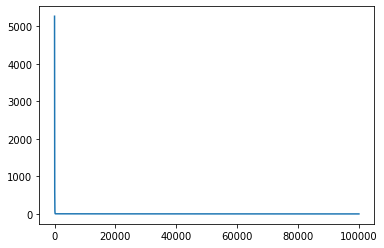

In [178]:
plt.plot(range(epochs), losses)

## Optimization result

In [179]:
W = model.linear.weight.item()
b = model.linear.bias.item()

print(f'W: {W}, b: {b}, loss: {loss}')

W: 0.22031040489673615, b: -6.999601364135742, loss: 1.121543049812317


## Optimization graph

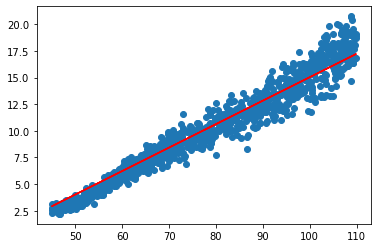

In [180]:
plt.scatter(x_train, y_train)
plt.plot(x_train, model.forward(x_train).detach(), 'r')